# 2.3 Pandas: series, dataframes, plots

Библиотека для анализа данных и манипяций с ними. Во многих местах из себя представляет фортрановские модули, к которым написаны биндинги для питона. Из-за этого работает очень быстро с одной стороны и много чего умеет, с другой. Например:

* Легко умеет обрабатывать случаи когда в исходном файле какая-то ерунда в некоторых ячейках
* Можно сливать данные, перемешивать колонки, вырезать и по-всячески манипуляровать ими
* Очень интуитивна. Когда наловчишься

Начнём с "табличного" формата. Он в пандас называется Data Frame и это в принципе не обязательно гомогенная структура данных с подписанными осями. На колонках и строчках можно делать массовые операции.

In [1]:
# Так как постоянно писать пять букв влом, обычно используют
# конструкцию "import as", чтобы писать только две
import pandas as pd

Дальше нам доступны все функции pandas. У неё, например, есть много способов прочитать данные и загрузить их в датафрейм. Можно читать excel, csv, json и тому подобное. Мы будем рассматривать работу с pandas на примере другого популярного датасета, в котором официант на протяжении нескольких месяцев записывал подробности о тех, кого он обслуживал, и как много ему давали на чай.

In [2]:
df = pd.read_csv("../datasets/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Узнать что там за колонки можно, подсмотрев "что это за оси"

In [5]:
df.axes

[RangeIndex(start=0, stop=244, step=1),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')]

Если интересует только индекс, можно посмотреть информацию только про него

In [6]:
df.index

RangeIndex(start=0, stop=244, step=1)

Данные не обязательно должны быть однотипные но когда это так, то pandas догадывается как их хранить. При этом строкоые константы чаще всего хранятся как тип "объект"

In [7]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
df.get_dtype_counts()

float64    2
int64      1
object     4
dtype: int64

Размеры датасета можно узнать по свойству shape

In [9]:
df.shape

(244, 7)

Совсем белково-дружелюбный вариант можно получить из методов describe или info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [11]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [12]:
df.get_dtype_counts()

float64    2
int64      1
object     4
dtype: int64

Можно выделять отдельные колонки, смотреть на уникальные значения в колонках, сортировать их, и производить над ними всякие математические операцци _en masse_

In [13]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [14]:
df["day"].nunique()

4

In [15]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [16]:
df.sort_values("tip", ascending=True).head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2


In [17]:
df.sort_values("total_bill", ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [18]:
df.sort_values(["sex", "time", "tip"], inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2


In [19]:
df["total_bill"].head()

67      3.07
92      5.75
111     7.25
0      16.99
215    12.90
Name: total_bill, dtype: float64

In [20]:
(df["total_bill"] * 70.4).head()

67      216.128
92      404.800
111     510.400
0      1196.096
215     908.160
Name: total_bill, dtype: float64

In [21]:
df["total_bill"].add(100)
df["total_bill"].sub(100)
df["total_bill"].mul(42)
df["total_bill"].div(42)

df["total_bill"].mul(70.4).head()

67      216.128
92      404.800
111     510.400
0      1196.096
215     908.160
Name: total_bill, dtype: float64

В качестве индекса можно вместо номера строки использовать одну из колонок. Если у вас данные категорийные и неуникальные, то по такому индексу могут будут доступны сразу несколько записей

In [22]:
df = pd.read_csv("../datasets/tips.csv", index_col="time")
df.head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4


In [23]:
df.loc["Dinner"].head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,10.34,1.66,Male,No,Sun,3
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,23.68,3.31,Male,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4


In [24]:
df.loc["Lunch"].head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Lunch,27.20,4.00,Male,No,Thur,4
Lunch,22.76,3.00,Male,No,Thur,2
Lunch,17.29,2.71,Male,No,Thur,2
Lunch,19.44,3.00,Male,Yes,Thur,2
Lunch,16.66,3.40,Male,No,Thur,2


In [25]:
df.index.unique()

Index(['Dinner', 'Lunch'], dtype='object', name='time')

In [26]:
"Lunch" in df.index

True

In [27]:
"Breakfast" in df.index

False

Если очень хочется доступ по номеру записи, то можно сделать iloc

In [28]:
df.iloc[23]

total_bill    39.42
tip            7.58
sex            Male
smoker           No
day             Sat
size              4
Name: Dinner, dtype: object

In [29]:
df.iloc[[2, 4, 23]]

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,21.01,3.50,Male,No,Sun,3
Dinner,24.59,3.61,Female,No,Sun,4
Dinner,39.42,7.58,Male,No,Sat,4


In [30]:
df.iloc[22:27]

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,15.77,2.23,Female,No,Sat,2
Dinner,39.42,7.58,Male,No,Sat,4
Dinner,19.82,3.18,Male,No,Sat,2
Dinner,17.81,2.34,Male,No,Sat,4
Dinner,13.37,2.00,Male,No,Sat,2


Фильтрация в пандас такая же как в numpy

In [31]:
df[df["sex"] == "Female"].head(7)

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,16.99,1.01,Female,No,Sun,2
Dinner,24.59,3.61,Female,No,Sun,4
Dinner,35.26,5.00,Female,No,Sun,4
Dinner,14.83,3.02,Female,No,Sun,2
Dinner,10.33,1.67,Female,No,Sun,3
Dinner,16.97,3.50,Female,No,Sun,3
Dinner,20.29,2.75,Female,No,Sat,2


Маски можно комбинировать, это удобно для ответа на запросы о данных.
Например, мы хотим узнать как дают на чай некурящие девушки по субботы

In [32]:
le_masque = df["sex"] == "Female"
le_masque = le_masque & (df["day"] == "Sat")
le_masque &= df["smoker"] == "No"
df[le_masque].head()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,20.29,2.75,Female,No,Sat,2
Dinner,15.77,2.23,Female,No,Sat,2
Dinner,19.65,3.00,Female,No,Sat,2
Dinner,15.06,3.00,Female,No,Sat,2
Dinner,20.69,2.45,Female,No,Sat,4


In [33]:
df[le_masque]["tip"].describe()

count    13.000000
mean      2.724615
std       0.961904
min       1.000000
25%       2.230000
50%       2.750000
75%       3.000000
max       4.670000
Name: tip, dtype: float64

Уже можно придумывать желтушные заголовки вида &laquo;75% некурящих девушек по субботам дают на чай не больше 3 тугриков&raquo; 

## Exercise 2.2.0

Выясните, сколько в среднем выходи полный счёт по пятницам на ланч у курящих мужчин

## Exercise 2.2.1

Загрузите iris опять и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов

## Pandas series

Series это как бы младший брат DataFrame, о которых можно думать как "это одна из колонок"

In [34]:
tea_list = ["чёрный", "зелёный", "травяной", "экспериментальный"]
pd.Series(tea_list) # то же самое что pd.Series(data=tea_list)

0               чёрный
1              зелёный
2             травяной
3    экспериментальный
dtype: object

In [35]:
list_of_ints  = [100,200,300]
pd.Series(list_of_ints)

0    100
1    200
2    300
dtype: int64

In [36]:
mixed_list = [42, False, "Дратути", None, [9, 8], {"name": "Алёнушка"}]
pd.Series(mixed_list)

0                      42
1                   False
2                 Дратути
3                    None
4                  [9, 8]
5    {'name': 'Алёнушка'}
dtype: object

Если вы инициализируете ваш Series объект из словарика, то ключи будут индексами

In [37]:
simple_dict = {"first_name": "Сергей", 
               "last_name": "Шнуров",
               "age": 45}
s = pd.Series(simple_dict)
display(s)

age               45
first_name    Сергей
last_name     Шнуров
dtype: object

In [38]:
s['first_name']

'Сергей'

Понятно, что у объекта Series есть всякие операторы, методы и тому подобное

In [39]:
print(dir(s))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_prepare__', '__array_priority__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__re

In [40]:
s.index

Index(['age', 'first_name', 'last_name'], dtype='object')

In [41]:
s.values

array([45, 'Сергей', 'Шнуров'], dtype=object)

In [42]:
s = pd.Series(tea_list)
s.values

array(['чёрный', 'зелёный', 'травяной', 'экспериментальный'], dtype=object)

In [43]:
s =  pd.Series([2.03, 1.64, 1.87, 1.75])
s.sum()

7.29

In [44]:
s.product()

10.894806999999998

In [45]:
s.mean()

1.8225

В отличие от dict, Series.index может быть неуникальным и его можно определять после

In [46]:
colors_list = ["red", "blue", "green", "yellow"]
numbers = ["one", "two", "three", "four"]

# pd.Series(colors_list, numbers) 
# pd.Series(colors_list, index=numbers) 
pd.Series(data=colors_list, index=numbers)

one         red
two        blue
three     green
four     yellow
dtype: object

In [47]:
s = pd.Series(data=colors_list, index=["one"]*3 + ["two"])
s

one       red
one      blue
one     green
two    yellow
dtype: object

In [48]:
s["one"]

one      red
one     blue
one    green
dtype: object

In [49]:
s = pd.Series(colors_list)
s.is_unique

True

In [50]:
s.shape

(4,)

In [51]:
print(s.name)
s = pd.Series(colors_list, name="Блаблабла")
print(s.name)
print("---")
print(s)

None
Блаблабла
---
0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object


In [52]:
s.sort_values()

1      blue
2     green
0       red
3    yellow
Name: Блаблабла, dtype: object

In [53]:
print(s.sort_values(ascending=False))

3    yellow
0       red
2     green
1      blue
Name: Блаблабла, dtype: object


In [54]:
print(s)
print("---")
s.sort_values(ascending=False, inplace=True)
print(s)

0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object
---
3    yellow
0       red
2     green
1      blue
Name: Блаблабла, dtype: object


In [55]:
s.sort_index()

0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object

In [56]:
s.sort_index(ascending=False)

3    yellow
2     green
1      blue
0       red
Name: Блаблабла, dtype: object

In [57]:
s.sort_index(inplace=True)
s

0       red
1      blue
2     green
3    yellow
Name: Блаблабла, dtype: object

In [58]:
s = pd.Series(colors_list)
'red' in s.values

True

In [59]:
0 in s.index

True

In [60]:
s[0]

'red'

In [61]:
s[[0, 2, 3]]

0       red
2     green
3    yellow
dtype: object

In [62]:
s.get(20, default="Непонятная штука")

'Непонятная штука'

In [63]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

0    2.3100
1    1.2000
2    2.5500
3    1.7000
4    4.4444
5    1.4100
dtype: float64

In [64]:
print(s.count(), len(s), s.sum(), s.mean(), s.product())

6 6 13.6144 2.269066666666667 75.30339895847997


In [65]:
s.describe()

count    6.000000
mean     2.269067
std      1.184686
min      1.200000
25%      1.482500
50%      2.005000
75%      2.490000
max      4.444400
dtype: float64

In [66]:
i = s.idxmax()
print("Максимум лежит по индексу %s и это %s" % (i, s.get(i)))

Максимум лежит по индексу 4 и это 4.4444


In [67]:
s = pd.Series(["Маша", "Паша", "Саша", "Маша", "Маша"])
s.value_counts()

Маша    3
Саша    1
Паша    1
dtype: int64

In [68]:
s.value_counts().sum()

5

In [69]:
s.count() == s.value_counts().sum()

True

In [70]:
s.value_counts(ascending=True)

Паша    1
Саша    1
Маша    3
dtype: int64

Ну и есть ещё полезные штуки map/apply:

In [71]:
s = pd.Series([2.31, 1.2, 2.55, 1.7, 4.4444, 1.41])
s

0    2.3100
1    1.2000
2    2.5500
3    1.7000
4    4.4444
5    1.4100
dtype: float64

In [72]:
def f(number):
    if number < 2.5:
        return "мало"
    return "МНОГО"

s.apply(f)

0     мало
1     мало
2    МНОГО
3     мало
4    МНОГО
5     мало
dtype: object

In [73]:
s.apply(lambda x: "%s штук" % x)

0      2.31 штук
1       1.2 штук
2      2.55 штук
3       1.7 штук
4    4.4444 штук
5      1.41 штук
dtype: object

In [74]:
s1 = pd.Series(data=["Маша", "Саша", "Паша", "Вася"])
s2 = pd.Series(
    data=[27, 12, 15, 70],
    index=["Маша", "Саша", "Паша", "Вася"])
s1.map(s2)

0    27
1    12
2    15
3    70
dtype: int64

In [75]:
s2_dict = s2.to_dict()

In [76]:
s2_dict["Паша"] = -13
s2_dict["Саша"] = 1000

In [77]:
s1.map(s2_dict)

0      27
1    1000
2     -13
3      70
dtype: int64

## Графики

Помимо прочего, датафреймы можно визуализировать и можно строить различные удобные графики прямо так, не отходя от кассы.

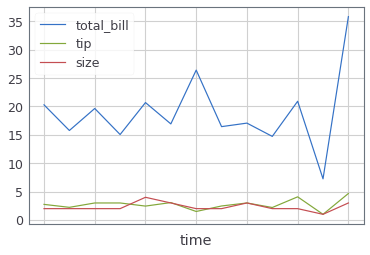

In [78]:
%matplotlib inline
df[le_masque].plot();

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


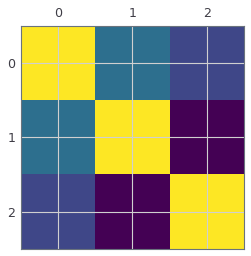

In [79]:
import matplotlib.pyplot as plt
display(df.corr())
plt.matshow(df.corr());

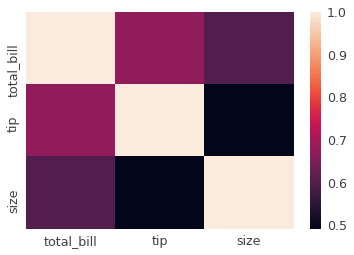

In [80]:
import seaborn as sns
corr = df.corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values);

А ещё в seaborn есть функция загрузки "эталонных" датасетов. В частности, тот же iris. Ну и вообще в плане графиков для исследовательского анализа seaborn очень удобен

In [81]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


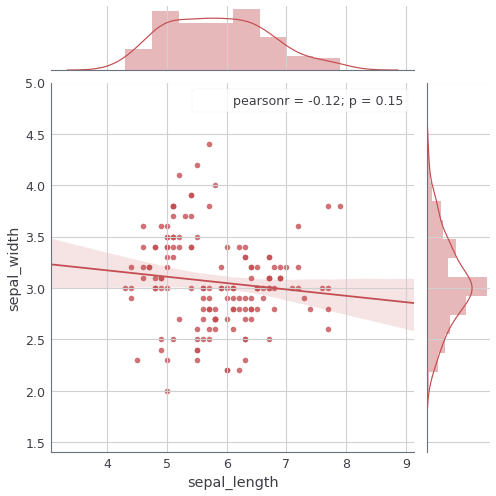

In [82]:
g = sns.jointplot("sepal_length",
                  "sepal_width", 
                  data=iris,
                  kind="reg",
                  color="r", size=7)

/usr/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


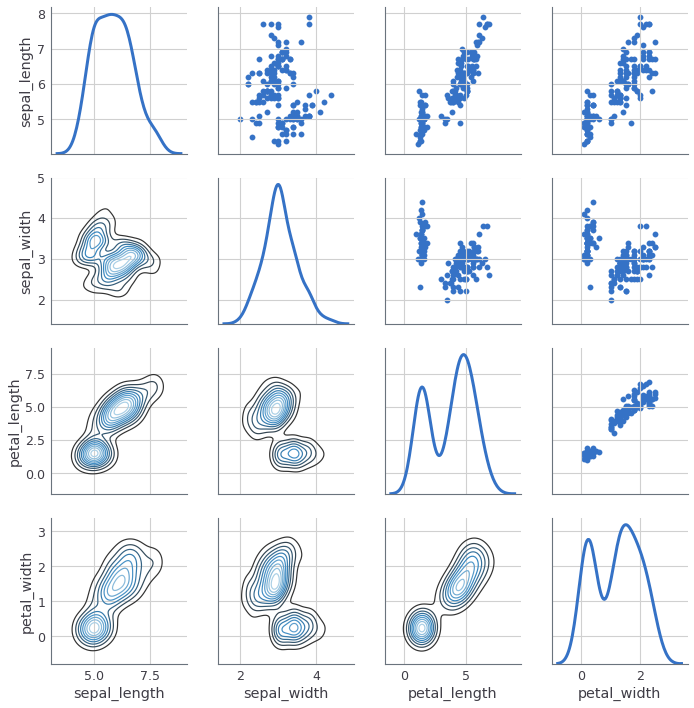

In [83]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

Этих инструментов достаточно чтобы решить большинство задач про базовый анализ данных. Попробуйте применить эти инструменты для своих данных. Если у вас не хватает идей, [ищите их в интернете](https://github.com/infoculture/awesome-opendata-rus#%D1%80%D0%B5%D0%BF%D0%BE%D0%B7%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%B8), вступайте в сообщество [Open Data Science](http://ods.ai/) (оно живёт в слаке) и не ограничивайтесь русскоязычными ресурсами.
// IM